## Exercise - Linear Regression with University GPA

The sat.csv file contains two columns, high_GPA and univ_GPA. It stands for high school GPA and university GPA. We have to predict university GPA based on the data given in high school GPA using Linear Regression.

### Perform the following operations:
1. Read the file in pandas. 
2. Plot a scatter (correlation) plot of high_GPA with univ_GPA with proper labels and axis limits using matplotlib (GPA goes from 0-4). Observe the trend in the data, does it look linear? What kind of correlation is this? 
3. Lets prepare data for our model training. Split the data into training & testing using the sklearns train test split function. The test datasize is 0.25. Lets plot this data using a scatter plot to observe which data was selected as test & train. On a single graph, plot a scatter of training data in red color, and testing data in red color. Does the training data cover the entire range of GPA prediction?
4. Fit the Linear regression model using training data. 
5. Now lets plot the regression line. On a graph window first plot the scatter plot of training data. On that, for high school GPA 0 & 4, plot a line with the prediction of 0 & 4 using the predict function. 
6. Predict the university GPA for the test dataset. Get the mean square error for predictions, and score of the model. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sat.csv')

In [ ]:
df.head()

,high_GPA,univ_GPA
0,3.45,3.52
1,2.78,2.91
2,2.52,2.40
3,3.67,3.47
4,3.24,3.47


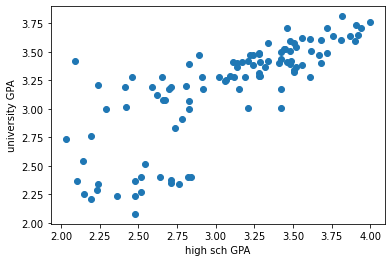

In [ ]:
plt.scatter(df.high_GPA, df.univ_GPA)
plt.xlabel("high sch GPA")
plt.ylabel("university GPA")
plt.show()

In [ ]:
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df.high_GPA, df.univ_GPA, test_size=0.25, random_state=1)

In [ ]:
train

,high_GPA,univ_GPA
0,3.45,3.52
3,3.67,3.47
4,3.24,3.47
6,2.82,2.40
7,2.36,2.24
...,...,...
99,2.48,2.08
100,3.76,3.64
102,3.07,3.25
103,2.19,2.76


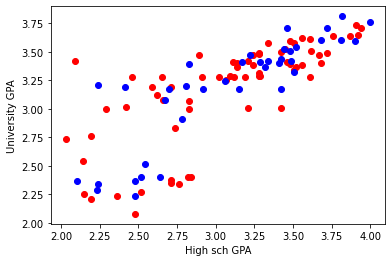

In [ ]:
plt.scatter(train.high_GPA, train.univ_GPA, color = 'red')
plt.scatter(test.high_GPA, test.univ_GPA, color = 'blue')
plt.xlabel("High sch GPA")
plt.ylabel("University GPA")
plt.show()

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['high_GPA']])
train_y = np.asanyarray(train[['univ_GPA']])
reg.fit(train_x, train_y)

print('coeffiecient : ', reg.coef_)
print('intercept : ', reg.intercept_)

coeffiecient :  [[0.6305112]]
intercept :  [1.23210143]


Text(0, 0.5, 'University GPA')

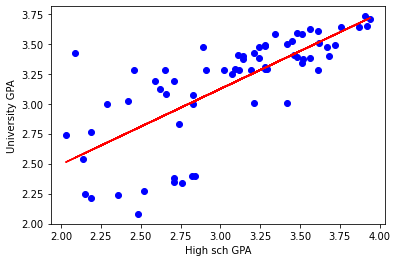

In [ ]:
plt.scatter(train.high_GPA, train.univ_GPA, color = 'blue')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("High sch GPA")
plt.ylabel("University GPA")

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['high_GPA']])
test_y = np.asanyarray(test[['univ_GPA']]) 
test_y_hat = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.20
Residual sum of squares (MSE): 0.06
R2-score: 0.43
